Import libraries

Taken from website:-
https://ourworldindata.org/coronavirus-source-data

In [39]:
import pandas as pd
import numpy as np

Read files

In [40]:
# load datasets
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90527,ZWE,Africa,Zimbabwe,2021-05-18,38595.0,23.0,21.000,1583.0,1.0,0.571,2596.729,1.547,1.413,106.507,0.067,0.038,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2154.0,527212.0,35.472,0.145,1850.0,0.124,0.011,88.1,tests performed,831954.0,600579.0,231375.0,17696.0,17455.0,5.60,4.04,1.56,1174.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
90528,ZWE,Africa,Zimbabwe,2021-05-19,38612.0,17.0,20.857,1583.0,0.0,0.571,2597.873,1.144,1.403,106.507,0.000,0.038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3113.0,530325.0,35.681,0.209,2032.0,0.137,0.010,97.4,tests performed,844684.0,605556.0,239128.0,12730.0,16331.0,5.68,4.07,1.61,1099.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
90529,ZWE,Africa,Zimbabwe,2021-05-20,38635.0,23.0,20.571,1585.0,2.0,0.429,2599.421,1.547,1.384,106.641,0.135,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2134.0,532459.0,35.825,0.144,1985.0,0.134,0.010,96.5,tests performed,867396.0,615296.0,252100.0,22712.0,16482.0,5.84,4.14,1.70,1109.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90532 entries, 0 to 90531
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               90532 non-null  object 
 1   continent                              86223 non-null  object 
 2   location                               90532 non-null  object 
 3   date                                   90532 non-null  object 
 4   total_cases                            87936 non-null  float64
 5   new_cases                              87935 non-null  float64
 6   new_cases_smoothed                     86928 non-null  float64
 7   total_deaths                           78098 non-null  float64
 8   new_deaths                             78256 non-null  float64
 9   new_deaths_smoothed                    86928 non-null  float64
 10  total_cases_per_million                87465 non-null  float64
 11  ne

Convert date to number

In [42]:
import datetime 

date = df.date

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date_num'] = df['date'].dt.strftime('%d%m%Y')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90527,ZWE,Africa,Zimbabwe,2021-05-18,38595.0,23.0,21.000,1583.0,1.0,0.571,2596.729,1.547,1.413,106.507,0.067,0.038,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2154.0,527212.0,35.472,0.145,1850.0,0.124,0.011,88.1,tests performed,831954.0,600579.0,231375.0,17696.0,17455.0,5.60,4.04,1.56,1174.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,18052021
90528,ZWE,Africa,Zimbabwe,2021-05-19,38612.0,17.0,20.857,1583.0,0.0,0.571,2597.873,1.144,1.403,106.507,0.000,0.038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3113.0,530325.0,35.681,0.209,2032.0,0.137,0.010,97.4,tests performed,844684.0,605556.0,239128.0,12730.0,16331.0,5.68,4.07,1.61,1099.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,19052021
90529,ZWE,Africa,Zimbabwe,2021-05-20,38635.0,23.0,20.571,1585.0,2.0,0.429,2599.421,1.547,1.384,106.641,0.135,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2134.0,532459.0,35.825,0.144,1985.0,0.134,0.010,96.5,tests performed,867396.0,615296.0,252100.0,22712.0,16482.0,5.84,4.14,1.70,1109.0,NaN,14862927.

Percent new deaths to new cases

In [43]:
df['per_death_to_case'] = df.new_cases / df.new_deaths
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num,per_death_to_case
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,24022020,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,25022020,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,26022020,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,27022020,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,28022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90527,ZWE,Africa,Zimbabwe,2021-05-18,38595.0,23.0,21.000,1583.0,1.0,0.571,2596.729,1.547,1.413,106.507,0.067,0.038,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2154.0,527212.0,35.472,0.145,1850.0,0.124,0.011,88.1,tests performed,831954.0,600579.0,231375.0,17696.0,17455.0,5.60,4.04,1.56,1174.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,18052021,23.0
90528,ZWE,Africa,Zimbabwe,2021-05-19,38612.0,17.0,20.857,1583.0,0.0,0.571,2597.873,1.144,1.403,106.507,0.000,0.038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3113.0,530325.0,35.681,0.209,2032.0,0.137,0.010,97.4,tests performed,844684.0,605556.0,239128.0,12730.0,16331.0,5.68,4.07,1.61,1099.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,19052021,inf
90529,ZWE,Africa,Zimbabwe,2021-05-20,38635.0,23.0,20.571,1585.0,2.0,0.429,2599.421,1.547,1.384,106.641,0.135,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2134.0,532459.0,35.825,0.144,1985.0,0.134,0.010,96.5,tests performed,867396.0,615296.0,252100.0,

Country

In [44]:
country = df['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Falkland Islands',
 'Fi

In [45]:
print(len(list_country))

226


Graphical Representation

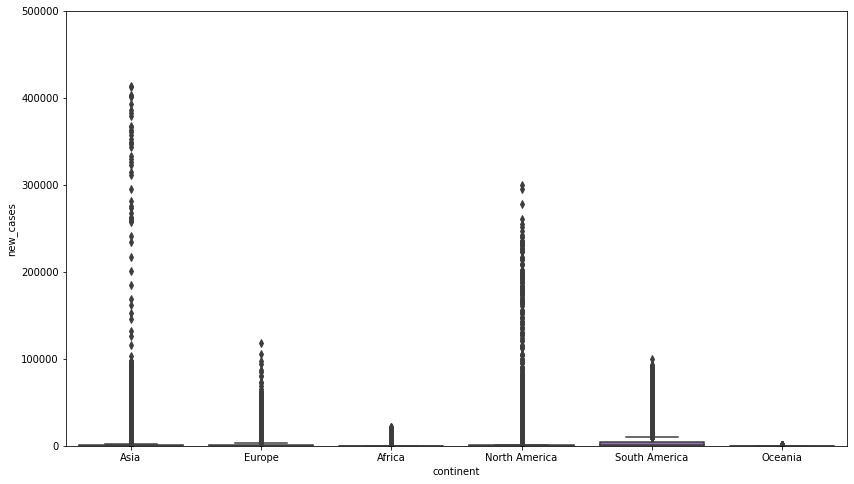

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

var = 'continent'
data = pd.concat([df['new_cases'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=500000);

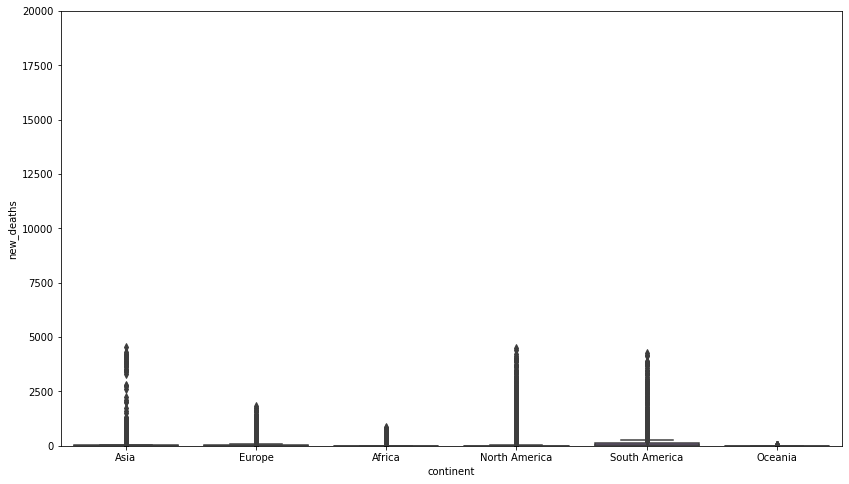

In [47]:
var = 'continent'
data = pd.concat([df['new_deaths'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

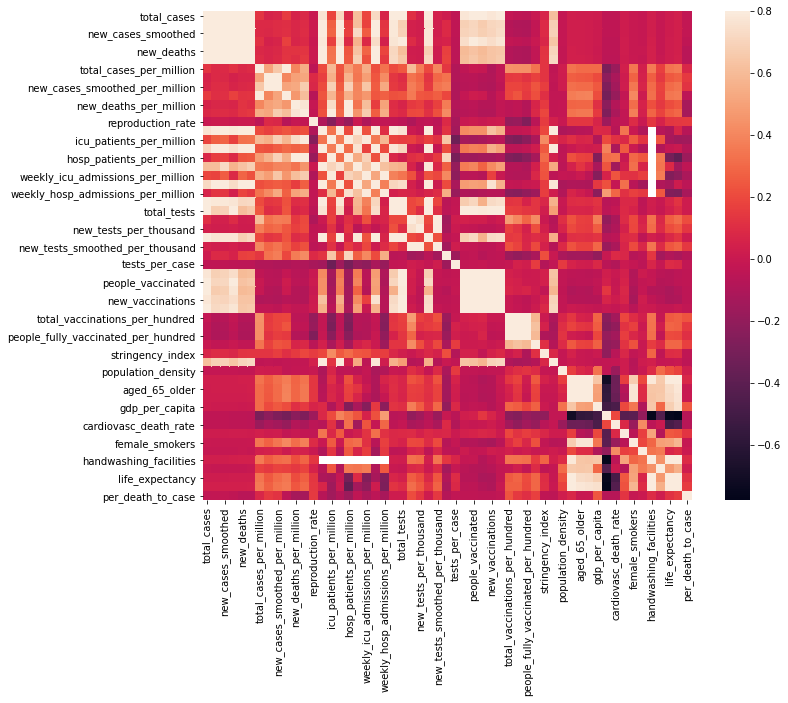

In [48]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Countries

In [49]:
country = "United Kingdom"

include_uk = df[df['location'].values == country]
exclude_uk = df[df['location'].values != country]
uk_cov19 = include_uk
uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num,per_death_to_case
85327,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,31012020,NaN
85328,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,01022020,NaN
85329,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,02022020,NaN
85330,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,03022020,NaN
85331,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,04022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85800,GBR,Europe,United Kingdom,2021-05-18,4466220.0,-2362.0,1539.143,127953.0,7.0,9.000,65789.997,-34.794,22.672,1884.822,0.103,0.133,0.97,124.0,1.827,895.0,13.184,NaN,NaN,NaN,NaN,732012.0,168404482.0,2480.695,10.783,610687.0,8.996,0.003,396.8,tests performed,57855958.0,36985505.0,20870453.0,498101.0,527852.0,85.23,54.48,30.74,7776.0,62.50,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,18052021,-337.428571
85801,GBR,Europe,United Kingdom,2021-05-19,4468366.0,2146.0,1517.714,127956.0,3.0,7.857,65821.609,31.612,22.357,1884.866,0.044,0.116,NaN,122.0,1.797,913.0,13.449,NaN,NaN,NaN,NaN,1180660.0,169635175.0,2498.824,17.392,610448.0,8.992,0.002,402.2,tests performed,58489834.0,37250363.0,21239471.0,633876.0,527456.0,86.16,54.87,31.29,7770.0,62.50,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,19052021,715.333333
85802,GBR,Europe,United Kingdom,2021-05-20,4471065.0,269

In [50]:
country = "Nepal"

include_nep = df[df['location'].values == country]
exclude_nep = df[df['location'].values != country]
nep_cov19 = include_nep
nep_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num,per_death_to_case
56959,NPL,Asia,Nepal,2020-01-25,1.0,1.0,NaN,NaN,NaN,NaN,0.034,0.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,29136808.0,204.43,25.0,5.809,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.602,25012020,NaN
56960,NPL,Asia,Nepal,2020-01-26,1.0,0.0,NaN,NaN,NaN,NaN,0.034,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,29136808.0,204.43,25.0,5.809,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.602,26012020,NaN
56961,NPL,Asia,Nepal,2020-01-27,1.0,0.0,NaN,NaN,NaN,NaN,0.034,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,29136808.0,204.43,25.0,5.809,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.602,27012020,NaN
56962,NPL,Asia,Nepal,2020-01-28,1.0,0.0,NaN,NaN,NaN,NaN,0.034,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,29136808.0,204.43,25.0,5.809,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.602,28012020,NaN
56963,NPL,Asia,Nepal,2020-01-29,1.0,0.0,NaN,NaN,NaN,NaN,0.034,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,29136808.0,204.43,25.0,5.809,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.602,29012020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57438,NPL,Asia,Nepal,2021-05-18,472354.0,8136.0,8463.286,5411.0,196.0,189.571,16211.591,279.234,290.467,185.710,6.727,6.506,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2539590.0,2113080.0,426510.0,NaN,7825.0,8.72,7.25,1.46,269.0,NaN,29136808.0,204.43,25.0,5.809,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.602,18052021,41.510204
57439,NPL,Asia,Nepal,2021-05-19,480418.0,8064.0,8295.571,5657.0,246.0,200.714,16488.354,276.763,284.711,194.153,8.443,6.889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10787.0,NaN,NaN,NaN,370.0,NaN,29136808.0,204.43,25.0,5.809,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.602,19052021,32.780488
57440,NPL,Asia,Nepal,2021-05-20,488645.0,8227.0,8207.714,5847.0,190.0,197.286,16770.711,282.358,281.696,200.674,6.521,6.771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2596711.0,2113080.0,483631.0,NaN,13750.0,8.91,7.25,1.66,472.0,NaN,29136808.0,204.43,25.0,

UK

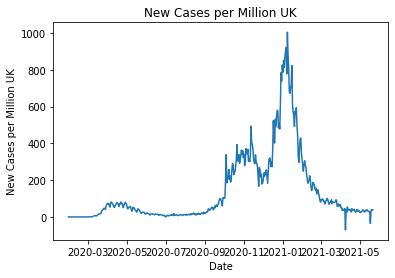

In [51]:
plt.plot(uk_cov19.date, uk_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million UK')
plt.title('New Cases per Million UK')
plt.show()

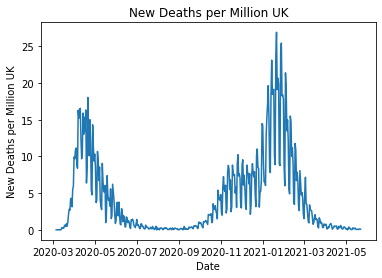

In [52]:
plt.plot(uk_cov19.date, uk_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million UK')
plt.title('New Deaths per Million UK')
plt.show()

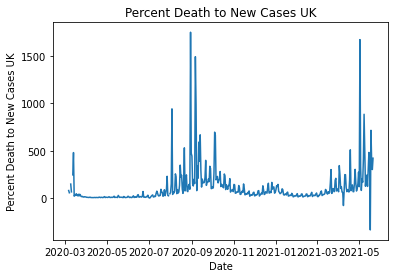

In [53]:
plt.plot(uk_cov19.date, uk_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases UK')
plt.title('Percent Death to New Cases UK')
plt.show()

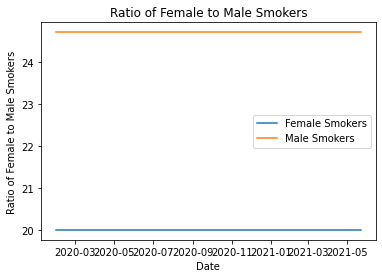

In [54]:
plt.plot(uk_cov19.date, uk_cov19.female_smokers)
plt.plot(uk_cov19.date, uk_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers')
plt.title('Ratio of Female to Male Smokers')
plt.show()

Nepal

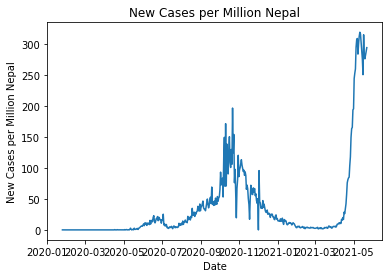

In [55]:
plt.plot(nep_cov19.date, nep_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million Nepal')
plt.title('New Cases per Million Nepal')
plt.show()

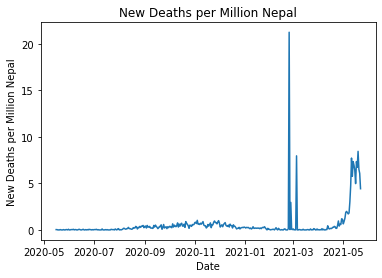

In [56]:
plt.plot(nep_cov19.date, nep_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million Nepal')
plt.title('New Deaths per Million Nepal')
plt.show()

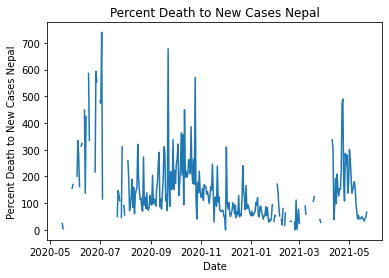

In [57]:
plt.plot(nep_cov19.date, nep_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases Nepal')
plt.title('Percent Death to New Cases Nepal')
plt.show()

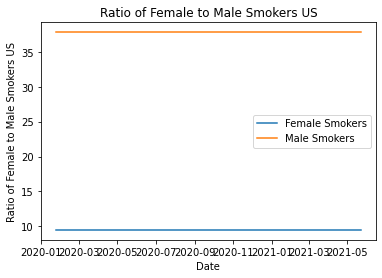

In [58]:
plt.plot(nep_cov19.date, nep_cov19.female_smokers)
plt.plot(nep_cov19.date, nep_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers US')
plt.title('Ratio of Female to Male Smokers US')
plt.show()

Comparisons

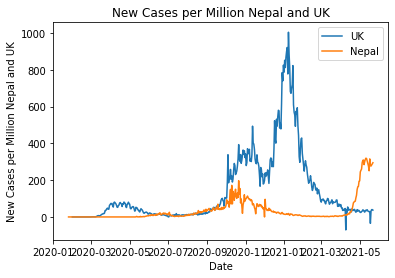

In [59]:
plt.plot(uk_cov19.date, uk_cov19.new_cases_per_million)
plt.plot(nep_cov19.date, nep_cov19.new_cases_per_million)
plt.legend(['UK', 'Nepal'])
plt.xlabel('Date')
plt.ylabel('New Cases per Million Nepal and UK')
plt.title('New Cases per Million Nepal and UK')
plt.show()

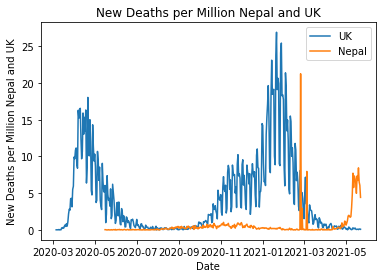

In [60]:
plt.plot(uk_cov19.date, uk_cov19.new_deaths_per_million)
plt.plot(nep_cov19.date, nep_cov19.new_deaths_per_million)
plt.legend(['UK', 'Nepal'])
plt.xlabel('Date')
plt.ylabel('New Deaths per Million Nepal and UK')
plt.title('New Deaths per Million Nepal and UK')
plt.show()

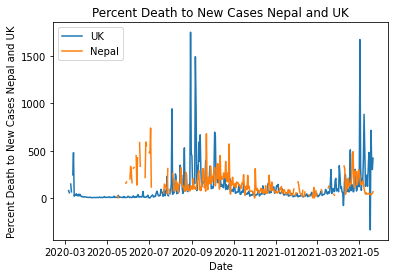

In [61]:
plt.plot(uk_cov19.date, uk_cov19.per_death_to_case)
plt.plot(nep_cov19.date, nep_cov19.per_death_to_case)
plt.legend(['UK', 'Nepal'])
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases Nepal and UK')
plt.title('Percent Death to New Cases Nepal and UK')
plt.show()

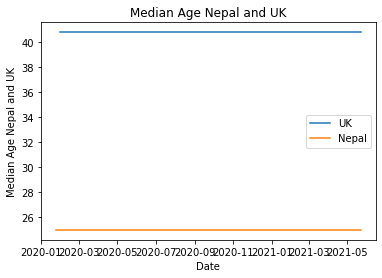

In [62]:
plt.plot(uk_cov19.date, uk_cov19.median_age)
plt.plot(nep_cov19.date, nep_cov19.median_age)
plt.legend(['UK', 'Nepal'])
plt.xlabel('Date')
plt.ylabel('Median Age Nepal and UK')
plt.title('Median Age Nepal and UK')
plt.show()

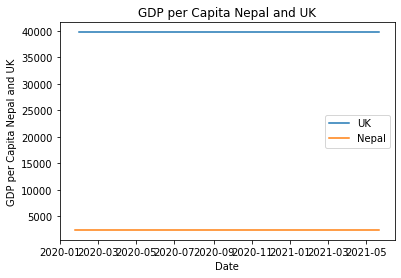

In [63]:
plt.plot(uk_cov19.date, uk_cov19.gdp_per_capita)
plt.plot(nep_cov19.date, nep_cov19.gdp_per_capita)
plt.legend(['UK', 'Nepal'])
plt.xlabel('Date')
plt.ylabel('GDP per Capita Nepal and UK')
plt.title('GDP per Capita Nepal and UK')
plt.show()

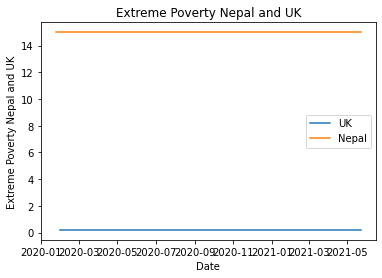

In [64]:
plt.plot(uk_cov19.date, uk_cov19.extreme_poverty)
plt.plot(nep_cov19.date, nep_cov19.extreme_poverty)
plt.legend(['UK', 'Nepal'])
plt.xlabel('Date')
plt.ylabel('Extreme Poverty Nepal and UK')
plt.title('Extreme Poverty Nepal and UK')
plt.show()

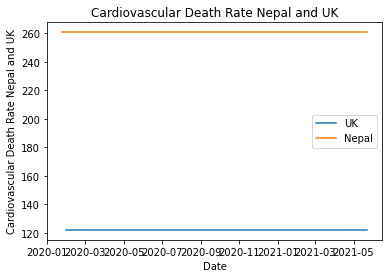

In [65]:
plt.plot(uk_cov19.date, uk_cov19.cardiovasc_death_rate)
plt.plot(nep_cov19.date, nep_cov19.cardiovasc_death_rate)
plt.legend(['UK', 'Nepal'])
plt.xlabel('Date')
plt.ylabel('Cardiovascular Death Rate Nepal and UK')
plt.title('Cardiovascular Death Rate Nepal and UK')
plt.show()

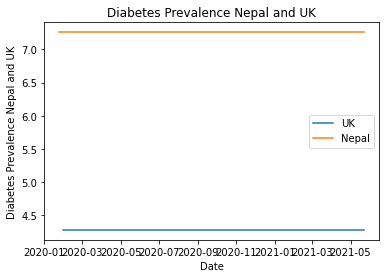

In [66]:
plt.plot(uk_cov19.date, uk_cov19.diabetes_prevalence)
plt.plot(nep_cov19.date, nep_cov19.diabetes_prevalence)
plt.legend(['UK', 'Nepal'])
plt.xlabel('Date')
plt.ylabel('Diabetes Prevalence Nepal and UK')
plt.title('Diabetes Prevalence Nepal and UK')
plt.show()

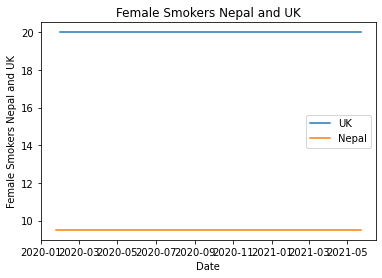

In [67]:
plt.plot(uk_cov19.date, uk_cov19.female_smokers)
plt.plot(nep_cov19.date, nep_cov19.female_smokers)
plt.legend(['UK', 'Nepal'])
plt.xlabel('Date')
plt.ylabel('Female Smokers Nepal and UK')
plt.title('Female Smokers Nepal and UK')
plt.show()

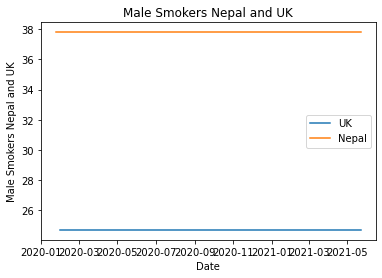

In [68]:
plt.plot(uk_cov19.date, uk_cov19.male_smokers)
plt.plot(nep_cov19.date, nep_cov19.male_smokers)
plt.legend(['UK', 'Nepal'])
plt.xlabel('Date')
plt.ylabel('Male Smokers Nepal and UK')
plt.title('Male Smokers Nepal and UK')
plt.show()

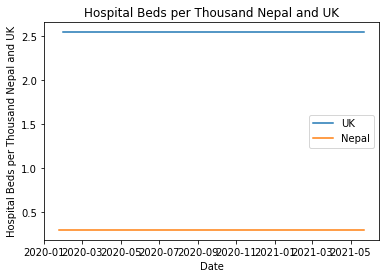

In [69]:
plt.plot(uk_cov19.date, uk_cov19.hospital_beds_per_thousand)
plt.plot(nep_cov19.date, nep_cov19.hospital_beds_per_thousand)
plt.legend(['UK', 'Nepal'])
plt.xlabel('Date')
plt.ylabel('Hospital Beds per Thousand Nepal and UK')
plt.title('Hospital Beds per Thousand Nepal and UK')
plt.show()

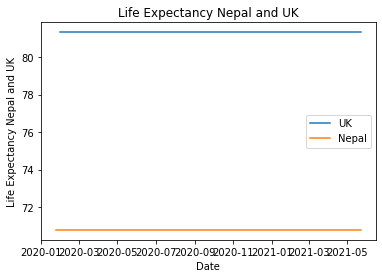

In [70]:
plt.plot(uk_cov19.date, uk_cov19.life_expectancy)
plt.plot(nep_cov19.date, nep_cov19.life_expectancy)
plt.legend(['UK', 'Nepal'])
plt.xlabel('Date')
plt.ylabel('Life Expectancy Nepal and UK')
plt.title('Life Expectancy Nepal and UK')
plt.show()

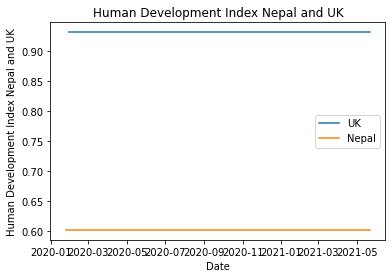

In [71]:
plt.plot(uk_cov19.date, uk_cov19.human_development_index)
plt.plot(nep_cov19.date, nep_cov19.human_development_index)
plt.legend(['UK', 'Nepal'])
plt.xlabel('Date')
plt.ylabel('Human Development Index Nepal and UK')
plt.title('Human Development Index Nepal and UK')
plt.show()